<a href="https://colab.research.google.com/github/Samirlamichhane10/sms_spam_classifier/blob/main/sms/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
fileurl = '/content/drive/MyDrive/Colab Notebooks/spam.csv'
sms=pd.read_csv(fileurl, encoding='latin-1')


In [5]:
sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1407,ham,Then we gotta do it after that,NaN,NaN,NaN
4461,ham,"Sorry I flaked last night, shit's seriously go...",NaN,NaN,NaN
38,ham,Anything lor... U decide...,NaN,NaN,NaN
5006,ham,Oh k. . I will come tomorrow,NaN,NaN,NaN
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th...",NaN,NaN,NaN


In [6]:
sms.rename(columns={'v1':'Label', 'v2':'message'}, inplace= True)

In [7]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
sms.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
sms.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
encoder = LabelEncoder()
sms['Label']=encoder.fit_transform(sms['Label'])  ## ham =0 , spam= 1

In [12]:
sms.duplicated().sum()

403

In [13]:
sms.drop_duplicates(keep='first',inplace=True)


In [14]:
sms['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [15]:
sms['Label'].describe()

count    5169.000000
mean        0.126330
std         0.332253
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Label, dtype: float64

In [16]:
len(sms['message'][0])

111

In [17]:
sms['message_length']= sms['message'].apply(lambda x : len(x))

In [18]:
sms.head()

,Label,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
sms[['Label', 'message_length']].describe()

,Label,message_length
count,5169.000000,5169.000000
mean,0.126330,78.977945
std,0.332253,58.236293
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,60.000000
75%,0.000000,117.000000
max,1.000000,910.000000


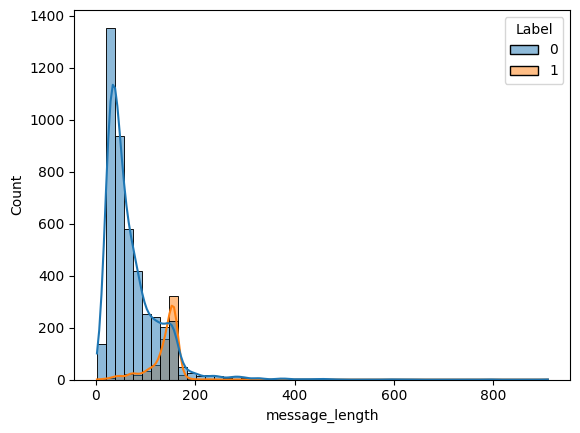

In [20]:
sns.histplot(data=sms,x=sms['message_length'], hue='Label' ,bins=50, kde=True)
plt.show()

In [21]:
sms[sms['Label']==1]['message_length'].describe()    # information of spam msg wrt msg_len  ## generally, spam messages quite longer

count    653.000000
mean     137.891271
std       30.137753
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64

In [22]:
sms[sms['Label']==0]['message_length'].describe()# information of ham msg wrt msg_length

count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: message_length, dtype: float64

<Axes: xlabel='message_length', ylabel='Count'>

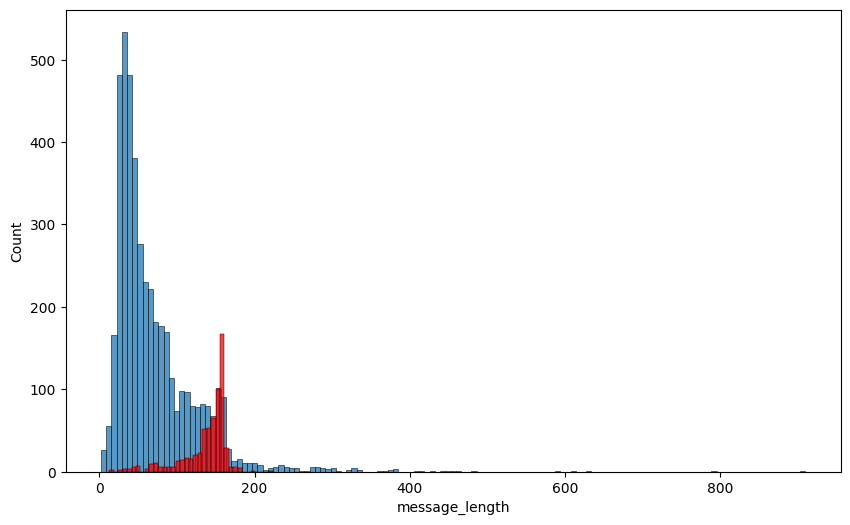

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(sms[sms['Label']==0]['message_length'])
sns.histplot(sms[sms['Label']==1]['message_length'],color='red')


In [24]:
sms[sms['message_length']==910]['message'].iloc[0] ## longest  but not spam

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [25]:
sms[sms['message_length']==244]['message'].iloc[0] ## longer and  spam

"Just so that you know,yetunde hasn't sent money yet. I just sent her a text not to bother sending. So its over, you dont have to involve yourself in anything. I shouldn't have imposed anything on you in the first place so for that, i apologise."

In [26]:
sms[['Label', 'message_length']].corr()

,Label,message_length
Label,1.000000,0.384717
message_length,0.384717,1.000000


In [27]:
spam_message=sms[sms['Label']==1]['message']

In [28]:
def text_processing(text):
  text_lower= text.lower()  ## string to lowercase
  text_list=word_tokenize(text_lower)  ## lowcased string to the list, listing of all the words present in a sentence

  lemmatizer= WordNetLemmatizer() ## instantation of the Lemmatizer

  text_list= [lemmatizer.lemmatize(text) for text in text_list if text not in stopwords.words('english')] ## lemmatize the tokenized list of word , if text is  not in stopwords

## now removing special characters and punctuations:
  text_list= [text for text in text_list if  text.isalnum()]  ## only alphanumeric    alnum()
  return ' '.join(text_list)## converting list into the string





In [29]:
sms['Transformed_msg']=sms['message'].apply(text_processing)

In [30]:
sms.head()

,Label,message,message_length,Transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though


In [31]:
sms_list=sms[sms['Label']==1]['Transformed_msg'].to_list()

In [32]:
word_sms_list=word_tokenize((' '.join(sms_list)))

## number of words in word_sms_list
j=0
for i in word_sms_list:
  j=j+1

print(j)

9939


In [33]:
from collections import Counter                     ## Counting the number of repeated words in the list
count_words=Counter(word_sms_list).most_common(30)
print(count_words)             ## returns the most common 30 words

[('call', 313), ('free', 191), ('2', 155), ('txt', 130), ('u', 126), ('text', 121), ('ur', 119), ('mobile', 114), ('stop', 104), ('claim', 98), ('reply', 97), ('4', 97), ('prize', 82), ('c', 80), ('get', 70), ('new', 64), ('service', 64), ('tone', 63), ('send', 58), ('urgent', 57), ('nokia', 54), ('phone', 52), ('cash', 51), ('contact', 51), ('week', 49), ('please', 49), ('win', 48), ('min', 45), ('customer', 42), ('guaranteed', 42)]


In [34]:
## converting the returned list into the dataframe

msg_df=pd.DataFrame(count_words, columns=['words','count'])

In [35]:
msg_df.head()

,words,count
0,call,313
1,free,191
2,2,155
3,txt,130
4,u,126


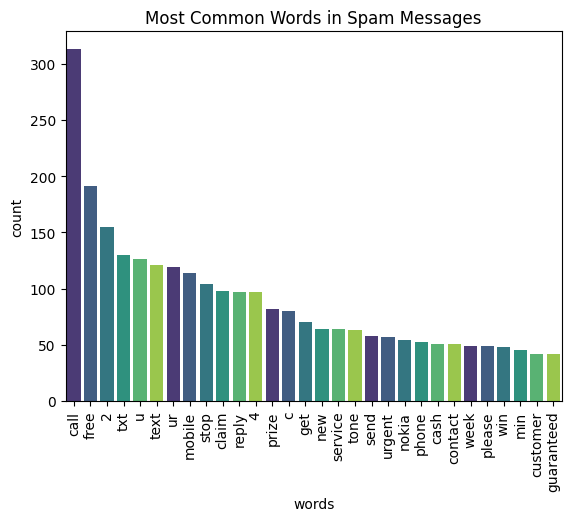

In [36]:
sns.barplot(x=msg_df['words'],y=msg_df['count'],palette=sns.color_palette("viridis"))
plt.xticks(rotation='vertical')

plt.title('Most Common Words in Spam Messages')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer   ## Vectorization using CounterVecotizer
cv= CountVectorizer()
X = cv.fit_transform(sms['Transformed_msg']).toarray()
y=sms['Label']



In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

classifier_mnb= MultinomialNB()
classifier_gnb= GaussianNB()
classifier_bnb= BernoulliNB()



In [40]:
classifier_mnb.fit(X_train, y_train)
y_predict_mnb= classifier_mnb.predict(X_test)

print(accuracy_score(y_test,y_predict_mnb))
print(confusion_matrix(y_test,y_predict_mnb))
print(classification_report(y_test,y_predict_mnb))
print(precision_score(y_test,y_predict_mnb))

0.971953578336557
[[870  19]
 [ 10 135]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.88      0.93      0.90       145

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034

0.8766233766233766


In [41]:
classifier_gnb.fit(X_train,y_train)
y_predict_gnb= classifier_gnb.predict(X_test)

print(accuracy_score(y_test,y_predict_gnb))
print(confusion_matrix(y_test,y_predict_gnb))
print(classification_report(y_test,y_predict_gnb))
print(precision_score(y_test,y_predict_gnb))

0.8829787234042553
[[787 102]
 [ 19 126]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       889
           1       0.55      0.87      0.68       145

    accuracy                           0.88      1034
   macro avg       0.76      0.88      0.80      1034
weighted avg       0.92      0.88      0.89      1034

0.5526315789473685


In [42]:
classifier_bnb.fit(X_train, y_train)
y_predict_bnb=classifier_bnb.predict(X_test)

print(accuracy_score(y_test,y_predict_bnb))
print(confusion_matrix(y_test,y_predict_bnb))
print(classification_report(y_test,y_predict_bnb))
print(precision_score(y_test,y_predict_bnb))

0.9642166344294004
[[885   4]
 [ 33 112]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034

0.9655172413793104


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer   ## Vectorization using CounterVecotizer
tfv= TfidfVectorizer()
X = tfv.fit_transform(sms['Transformed_msg']).toarray()
y=sms['Label']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
classifier_mnb.fit(X_train, y_train)
y_predict_mnb= classifier_mnb.predict(X_test)

print(accuracy_score(y_test,y_predict_mnb))
print(confusion_matrix(y_test,y_predict_mnb))
print(classification_report(y_test,y_predict_mnb))
print(precision_score(y_test,y_predict_mnb))

0.960348162475822
[[889   0]
 [ 41 104]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

1.0


In [45]:
classifier_gnb.fit(X_train,y_train)
y_predict_gnb= classifier_gnb.predict(X_test)

print(accuracy_score(y_test,y_predict_gnb))
print(confusion_matrix(y_test,y_predict_gnb))
print(classification_report(y_test,y_predict_gnb))
print(precision_score(y_test,y_predict_gnb))

0.8781431334622823
[[787 102]
 [ 24 121]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       889
           1       0.54      0.83      0.66       145

    accuracy                           0.88      1034
   macro avg       0.76      0.86      0.79      1034
weighted avg       0.91      0.88      0.89      1034

0.5426008968609866


In [46]:
classifier_bnb.fit(X_train, y_train)
y_predict_bnb=classifier_bnb.predict(X_test)

print(accuracy_score(y_test,y_predict_bnb))
print(confusion_matrix(y_test,y_predict_bnb))
print(classification_report(y_test,y_predict_bnb))
print(precision_score(y_test,y_predict_bnb))

0.9642166344294004
[[885   4]
 [ 33 112]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034

0.9655172413793104
